<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

# 1er partie

## Imporation des libraries

In [1]:
import pandas as pd # Manipulation de données tabulaires
import numpy as np # Manipulation de tableaux numériques

# Visualisation de données #
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split # Séperation du Data
from sklearn.preprocessing import StandardScaler # normalisation du Data

# Importation des modéles
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV, cross_val_score # Optimisation des hyperparamètres.
from sklearn.metrics import mean_squared_error, r2_score # Evaluation des modéles

from statistics import mean # Calcul de la moyenne
import time # Calcul du temps d'excution

from math import inf

## Chargement des données

In [2]:
period_0 = pd.read_csv('period_0.csv')
period_0.head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


In [3]:
period_0.describe()

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.06900,0.508000,3.011000,5.975000,0.371700,97.949068,0.989000,1.012000,35.884260
std,5.05943,0.720038,1.731438,2.399194,0.219133,100.222845,1.002938,1.022204,17.619171
min,7.00000,0.000000,0.000000,1.000000,0.000000,0.012724,0.000000,0.000000,0.000000
25%,21.00000,0.000000,2.000000,4.000000,0.180000,29.333357,0.000000,0.000000,25.575000
50%,24.00000,0.000000,3.000000,6.000000,0.380000,68.037177,1.000000,1.000000,33.655000
75%,27.00000,1.000000,4.000000,7.000000,0.560000,127.063901,2.000000,2.000000,43.772500
max,41.00000,4.000000,9.000000,15.000000,0.750000,831.026761,5.000000,7.000000,138.880000


## Test rapide des données

In [4]:
period_0.isnull().sum() # verifier les valeurs manquantes

Age                    0
Seniority              0
Orders                 0
Items                  0
AverageDiscount        0
TopCategory            0
BrowsingTime           0
EmailsOpened           0
SupportInteractions    0
TotalCart              0
dtype: int64

Le résultat affiché montre qu'il n'y a aucune valeur manquante dans notre dataset.

In [5]:
period_0._get_numeric_data().columns  # voir les variables numeriques

Index(['Age', 'Seniority', 'Orders', 'Items', 'AverageDiscount',
       'BrowsingTime', 'EmailsOpened', 'SupportInteractions', 'TotalCart'],
      dtype='object')

On remarque qu'on a une variable catégorielle nommée 'TopCategory'. 

## Preparation des données 

In [6]:
# Encoder la variable catégorielle 'TopCategory' (one-hot encoding)
period_0_encoded = pd.get_dummies(period_0, columns=['TopCategory'])
period_0_encoded.head()
# diviser le data en input features et target variable
X = period_0_encoded.drop('TotalCart', axis=1)
y = period_0_encoded['TotalCart']

In [7]:
y.describe() # analyser l'echelle du target variable

count    1000.000000
mean       35.884260
std        17.619171
min         0.000000
25%        25.575000
50%        33.655000
75%        43.772500
max       138.880000
Name: TotalCart, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # diviser les données en tarining set et test set (avec 20% en test)

In [9]:
print(y_train.shape, y_test.shape) # test

(800,) (200,)


## Training des modéles

Après la preparation des données, on passe à l'entrainement des modèles de d'apprentissage automatique en faisant la recherche d'hyperparamètres optimaux (Grille search)

Pour cette étape, on va utiliser trois différents modèles : 

*   *Random Forest Regressor* :  un algorithme d'apprentissage automatique qui combine plusieurs arbres de décision pour prédire une variable continue. Il utilise la moyenne des prédictions de chaque arbre pour améliorer la précision de la prédiction. 

*   *Gradient Boosting Regressor* : Le gradient boosting regressor est un algorithme d'apprentissage automatique qui utilise une combinaison de modèles de prédiction faibles pour améliorer la précision de la prédiction d'une variable continue. Il utilise une méthode de descente de gradient pour ajuster les modèles et minimiser l'erreur résiduelle. 

*   *Linear Regression* : La régression linéaire est un algorithme d'apprentissage automatique qui modélise la relation linéaire entre une variable dépendante continue et une ou plusieurs variables indépendantes. Elle est utilisée pour prédire la valeur d'une variable dépendante en fonction de la valeur des variables indépendantes.





Pour la validation et l'evaluation des ces modéles, on va calculer : 

*   *R2 score* : Le R2 score, également connu sous le nom de coefficient de détermination, est une mesure de l'ajustement du modèle aux données. Il représente la proportion de la variance totale de la variable dépendante qui est expliquée par le modèle. Le R2 score peut varier de 0 à 1, où une valeur de 1 indique une bonne correspondance entre les prévisions du modèle et les données réelles.

  La formule pour calculer le R2 score est :

  \begin{equation}
  R^2 = 1 - \frac{SSE}{SST}
  \end{equation}

  Où SSE est la somme des carrés des erreurs et SST est la somme totale des carrés.


*   *Mean Squared Error (MSE)* :  MSE est une mesure de l'erreur quadratique moyenne entre les prévisions du modèle et les valeurs réelles. Elle calcule la moyenne de la différence au carré entre chaque prédiction et sa valeur réelle, ce qui permet de mesurer l'efficacité du modèle.
  \begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2
\end{equation}

  Où y est la valeur réelle, $\hat{y}$ est la valeur prédite par le modèle, et n est le nombre total d'observations dans l'échantillon.


### Random Forest Regressor

In [10]:
# Definir le hyperparameter grid 
param_grid_rf = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'max_features': [ 1.0, 'sqrt', 'log2']}

# Instancier le modèle et effectuer grid search
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)

# Enregistrer l'heure de début
start_time = time.time()

rf_grid.fit(X_train, y_train) # training

# Enregistrer l'heure de fin
end_time = time.time()

# Calculer le temps d'exécution
execution_time = end_time - start_time

print("Le temps d'exécution est de {} secondes".format(execution_time))

# Evaluer le meilleur modèle sur le training set
rf_train_score = rf_grid.score(X_train, y_train)
print('Random Forest Regressor training score:', rf_train_score)

# Evaluer le meilleur modèle sur le test set
rf_test_score = rf_grid.score(X_test, y_test)
print('Random Forest Regressor test score:', rf_test_score)

# Calculer le MSE sur le test set
y_test_pred = rf_grid.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE sur le test set:', mse_test)


# Calculer le MSE sur chaque validation set
mse_cv_scores = []
for i in range(len(rf_grid.cv_results_['params'])):
    params = rf_grid.cv_results_['params'][i]
    mse = rf_grid.cv_results_['mean_test_score'][i]
    #print(f"MSE sur la validation set {i+1} ({params}): {mse}")
    mse_cv_scores.append(mse)

#print('Moyenne de MSE:', mean(mse_cv_scores))




Le temps d'exécution est de 91.08078169822693 secondes
Random Forest Regressor training score: 0.9971827768077743
Random Forest Regressor test score: 0.9813292083647931
MSE sur le test set: 4.522319409938819


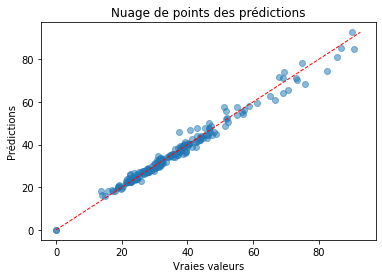

In [11]:
# Tracer le nuage de points avec les vraies valeurs sur l'axe x et les prédictions sur l'axe y
plt.scatter(y_test, y_test_pred, alpha=0.5)

# Ajouter une ligne diagonale pour représenter la relation linéaire parfaite
max_val = max(np.max(y_test), np.max(y_test_pred))
plt.plot([0, max_val], [0, max_val], '--', color='red', linewidth=1)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Nuage de points des prédictions')
plt.show()

### Gradient Boosting Regressor

In [12]:
# Definir le hyperparameter grid 
param_grid_xgb = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'learning_rate': [0.01, 0.1, 1.0]}

# Instancier le modèle et effectuer grid search
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(estimator=gb_model, param_grid=param_grid_xgb, cv=5)

# Enregistrer l'heure de début
start_time = time.time()

gb_grid.fit(X_train, y_train) # training

# Enregistrer l'heure de fin
end_time = time.time()

# Calculer le temps d'exécution
execution_time = end_time - start_time

print("Le temps d'exécution est de {} secondes".format(execution_time))

# Evaluer le meilleur modèle sur le training set
gb_train_score = gb_grid.score(X_train, y_train)
print('Gradient Boosting Regressor training score:', gb_train_score)

# Evaluer le meilleur modèle sur le test set
gb_test_score = gb_grid.score(X_test, y_test)
print('Gradient Boosting Regressor test score:', gb_test_score)

# Calculer le MSE sur le test set
y_test_pred = gb_grid.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE sur le test set:', mse_test)

# Calculer le MSE sur chaque validation set
mse_cv_scores = []
for i in range(len(gb_grid.cv_results_['params'])):
    params = gb_grid.cv_results_['params'][i]
    mse = gb_grid.cv_results_['mean_test_score'][i]
    #print(f"MSE sur la validation set {i+1} ({params}): {mse}")
    mse_cv_scores.append(mse)

#print('Moyenne de MSE:', mean(mse_cv_scores))

Le temps d'exécution est de 74.38727045059204 secondes
Gradient Boosting Regressor training score: 0.9999673201764662
Gradient Boosting Regressor test score: 0.9939527632269524
MSE sur le test set: 1.4647229088926637


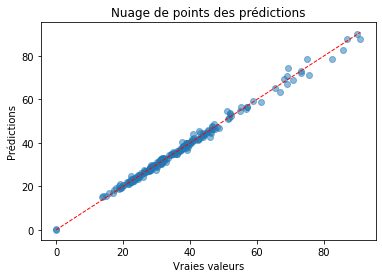

In [13]:
# Tracer le nuage de points avec les vraies valeurs sur l'axe x et les prédictions sur l'axe y
plt.scatter(y_test, y_test_pred, alpha=0.5)

# Ajouter une ligne diagonale pour représenter la relation linéaire parfaite
max_val = max(np.max(y_test), np.max(y_test_pred))
plt.plot([0, max_val], [0, max_val], '--', color='red', linewidth=1)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Nuage de points des prédictions')
plt.show()

### Linear Regression

In [14]:
# Definir le hyperparameter grid 
param_grid_lr = {'fit_intercept': [True, False]}

# Standardiser les features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instancier le modèle et effectuer grid search
lr_model = LinearRegression()
lr_grid = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5)

# Enregistrer l'heure de début
start_time = time.time()

lr_grid.fit(X_train_scaled, y_train) # training

# Enregistrer l'heure de fin
end_time = time.time()

# Calculer le temps d'exécution
execution_time = end_time - start_time

print("Le temps d'exécution est de {} secondes".format(execution_time))

# Evaluer le meilleur modèle sur le training set
lr_train_score = lr_grid.score(X_train_scaled, y_train)
print('Linear Regression training score:', lr_train_score)

# Evaluer le meilleur modèle sur le test set
lr_test_score = lr_grid.score(X_test_scaled, y_test)
print('Linear Regression test score:', lr_test_score)

# Calculer le MSE sur le test set
y_test_pred = lr_grid.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE sur le test set:', mse_test)

# Calculer le MSE sur chaque validation set
mse_cv_scores = []
for i in range(len(lr_grid.cv_results_['params'])):
    params = lr_grid.cv_results_['params'][i]
    mse = lr_grid.cv_results_['mean_test_score'][i]
    #print(f"MSE sur la validation set {i+1} ({params}): {mse}")
    mse_cv_scores.append(mse)

#print('Moyenne de MSE:', mean(mse_cv_scores))

Le temps d'exécution est de 0.08665633201599121 secondes
Linear Regression training score: 0.7709364373526062
Linear Regression test score: 0.9242628734870076
MSE sur le test set: 18.344561064933178


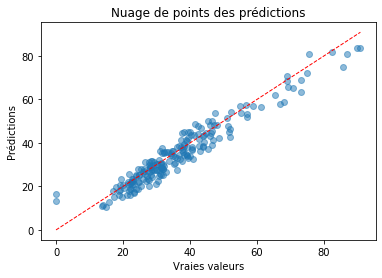

In [15]:
# Tracer le nuage de points avec les vraies valeurs sur l'axe x et les prédictions sur l'axe y
plt.scatter(y_test, y_test_pred, alpha=0.5)

# Ajouter une ligne diagonale pour représenter la relation linéaire parfaite
max_val = max(np.max(y_test), np.max(y_test_pred))
plt.plot([0, max_val], [0, max_val], '--', color='red', linewidth=1)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Nuage de points des prédictions')
plt.show()

## Analyse des Resultats

Ces résultats montrent que le modèle de régression linéaire est moins performant que les modèles de random forest et de gradient boosting, avec un score R2 inférieur et une MSE plus élevée. Cela peut être dû au fait que la régression linéaire ne modélise pas les relations non linéaires entre les variables indépendantes et la variable dépendante, contrairement aux modèles de random forest et de gradient boosting qui peuvent modéliser des relations plus complexes.

En comparant les résultats des deux modèles (Gradient Boosting et Random Forest), on peut voir que le Gradient Boosting Regressor a une meilleure performance que le Random Forest Regressor, avec un score de test plus élevé et une MSE plus faible. En outre, le temps d'exécution de Random Forest est plus long que celui de Gradient Boosting.

Donc, Vu que la performance de Random Forest est légèrement inférieure et le temps d'excution est plus important, Gradient Boosting peut être plus approprié pour etre utilisé dans les parties suivantes.



# 2eme Partie

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

## Chargement des données du Test

In [16]:
period_1 = pd.read_csv('period_1.csv')
period_2 = pd.read_csv('period_2.csv')
period_3 = pd.read_csv('period_3.csv')

## Training du Gradient boosting regressor

In [17]:
period_0_encoded.head()

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart,TopCategory_Beauty & Personal Care,"TopCategory_Clothing,Shoes & Jewelry",TopCategory_Electronics,"TopCategory_Health, Household & Baby Care",TopCategory_Home & Kitchen,TopCategory_Office Supplies,TopCategory_Pet Supplies,TopCategory_Sports & outdoors,TopCategory_Toys & Games
0,21,2,4,7,0.14,68.473629,3,2,34.00,0,1,0,0,0,0,0,0,0
1,22,0,4,5,0.50,29.258063,1,0,28.28,0,0,0,0,0,0,0,0,1
2,22,1,2,6,0.37,11.515517,0,0,19.33,0,0,0,1,0,0,0,0,0
3,19,0,2,8,0.60,74.495861,1,0,26.83,0,0,0,0,0,0,0,0,1
4,25,1,1,5,0.58,1.682705,2,1,17.67,0,0,0,0,0,0,0,0,1


In [18]:
X_train_drift = period_0_encoded.drop('TotalCart', axis=1)
y_train_drift = period_0_encoded['TotalCart']

In [19]:
# Definir le hyperparameter grid 
param_grid_xgb = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'learning_rate': [0.01, 0.1, 1.0]}

# Instancier le modèle et effectuer grid search
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(estimator=gb_model, param_grid=param_grid_xgb, cv=5)
gb_grid.fit(X_train_drift, y_train_drift)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 300]})

## Preparation des données du test

In [20]:
# Encoder la variable catégorielle 'TopCategory' avec one-hot encoding
period_1_encoded = pd.get_dummies(period_1, columns=['TopCategory'])
period_2_encoded = pd.get_dummies(period_2, columns=['TopCategory'])
period_3_encoded = pd.get_dummies(period_3, columns=['TopCategory'])

In [21]:
# Séparer de la variable cible et des features pour chaque période
X_test_1 = period_1_encoded.drop('TotalCart', axis=1)
y_test_1 = period_1_encoded['TotalCart']
X_test_2 = period_2_encoded.drop('TotalCart', axis=1)
y_test_2 = period_2_encoded['TotalCart']
X_test_3 = period_3_encoded.drop('TotalCart', axis=1)
y_test_3 = period_3_encoded['TotalCart']

## Performance du modéle et analyse de resultat

In [22]:
print('______________________________________ Period 1 ______________________________________\n')
# Prédiction sur les données de la période 1
y_pred_1 = gb_grid.predict(X_test_1)
score_r2_1 = r2_score(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)

print('Gradient Boosting Regressor MSE score            : ', mse_1)
print('Gradient Boosting Regressor test R-squared score : ', score_r2_1,'\n')
print('______________________________________ Period 2 ______________________________________\n')
# Prédiction sur les données de la période 2
y_pred_2 = gb_grid.predict(X_test_2)
score_r2_2 = r2_score(y_pred_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print('Gradient Boosting Regressor MSE score            : ',mse_2)
print('Gradient Boosting Regressor test R-squared score :', score_r2_2,'\n')
print('______________________________________ Period 3 ______________________________________\n')
# Prédiction sur les données de la période 3
y_pred_3 = gb_grid.predict(X_test_3)
score_r2_3 = r2_score(y_test_3, y_pred_3)
mse_3 = mean_squared_error(y_test_3, y_pred_3)
print('Gradient Boosting Regressor MSE score            : ',mse_3)
print('Gradient Boosting Regressor test R-squared score :', score_r2_3)

______________________________________ Period 1 ______________________________________

Gradient Boosting Regressor MSE score            :  62.99987497554372
Gradient Boosting Regressor test R-squared score :  0.8216174873020041 

______________________________________ Period 2 ______________________________________

Gradient Boosting Regressor MSE score            :  78.19920938842394
Gradient Boosting Regressor test R-squared score : 1.0 

______________________________________ Period 3 ______________________________________

Gradient Boosting Regressor MSE score            :  161.5792351652875
Gradient Boosting Regressor test R-squared score : 0.7045407250612046


Lorsque le modèle est testé sur les données des périodes 1, 2 et 3, on observe une évolution de la performance du modèle comme suit :

*   Pour la période 1, le modèle a un MSE de 62.99987497554372, ce qui est beaucoup plus élevé que le MSE obtenu lors de l'entraînement sur la période 0. Cela suggère que le modèle ne se généralise pas très bien à de nouvelles données et qu'il y a peut-être un surajustement sur les données d'entraînement. Le R² score de test de 0.8216174873020041 indique que le modèle explique environ 82 % de la variance dans les données de la période 1.

*   Pour la période 2, le modèle a un MSE de 78.19920938842394, ce qui est également plus élevé que le MSE obtenu lors de l'entraînement sur la période 0. Cependant, le R² score de test de 1.0 indique que le modèle explique parfaitement la variance dans les données de la période 2. Cela peut suggérer que les données de la période 2 sont plus faciles à prédire que celles des périodes précédentes.

*   Pour la période 3, le modèle a un MSE de 161.5792351652875, ce qui est considérablement plus élevé que les MSE obtenus pour les périodes précédentes. Le R² score de test de 0.7045407250612046 suggère que le modèle explique environ 70 % de la variance dans les données de la période 3, ce qui est inférieur à ce qui a été observé pour la période 1.


En général, cela peut indiquer que le modèle a été surentraîné sur la période 0 et ne généralise pas bien aux autres périodes, ce qui peut être un signe de dérive des données. Il est donc important de prendre en compte cette variabilité lors de l'évaluation et de l'interprétation des résultats du modèle, et d'explorer davantage les caractéristiques des données pour chaque période pour mieux comprendre cette variabilité.







Aussi, on peut tracer les prévisions et les valeurs réelles pour chaque période. Le modèle prédictif utilisé ici est un GradientBoostingRegressor, qui a été entraîné sur les données de la période 0 et testé sur les données des périodes 1, 2 et 3. Les prévisions sont tracées en bleu et les valeurs réelles en orange.

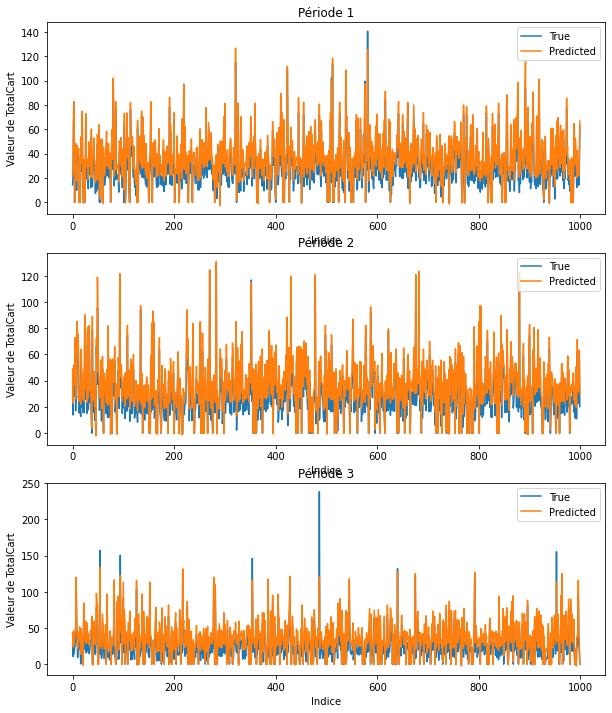

In [23]:
# Graphique des prévisions et des valeurs réelles pour chaque période
fig, axs = plt.subplots(3, figsize=(10,12))

for i in range(1, 4):
    df_name = f"period_{i}_encoded"
    # Récupérer le data en utilisant period_i
    df_i = globals()[df_name]
    X_test = df_i.drop('TotalCart', axis=1)
    y_test = df_i["TotalCart"]
    y_pred = gb_grid.predict(X_test)
    axs[i-1].plot(y_test.values, label="True")
    axs[i-1].plot(y_pred, label="Predicted")
    axs[i-1].legend()
    axs[i-1].set_title("Période " + str(i))
    axs[i-1].set_xlabel("Indice")
    axs[i-1].set_ylabel("Valeur de TotalCart")
plt.show()

On constate que les prévisions ne suivent pas bien les valeurs réelles, cela indique que le modèle n'est pas capable de généraliser parfaitement à des données  qu'il n'a pas vues lors de l'entraînement.

# 3eme Partie

## Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [24]:
P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    
    # Insérez votre code ici
    assert len(P) == len(Q), "Les vecteurs P et Q doivent avoir la même taille."
    #assert np.all(P), "P contient des valeurs nulles"
    
    return np.sum(P * np.log(P / Q)) 

def JSDivergence(P, Q):
    
    # Insérez votre code ici
    assert len(P) == len(Q), "Les vecteurs P et Q doivent avoir la même taille."
    #assert np.all(P), "P contient des valeurs nulles"

    M = (P + Q) / 2
    
    return (KLDivergence(P, M) + KLDivergence(Q, M)) / 2

    

* Lancer la cellule suivante pour tester votre fonction.

In [25]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


## Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [26]:
def WassersteinDistance(X, Y, p):
  
    
    # Insérez votre code ici

    # Tri des échantillons
    X_tri = np.sort(X)
    Y_tri = np.sort(Y)

    # Calcul de la distance de Wasserstein
    n = len(X)
    Wp = (1/n) * np.sum(np.abs(X_tri - Y_tri)**p)**(1/p)
    
    return Wp
    
    
    

* Lancer la cellule suivante pour tester votre fonction.

In [27]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.009277845675125648

# 4eme Partie

## Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

Pour illustrer et analyser visuellement la dérive des données ainsi que la dérive du modèle sur les périodes 1 à 3, nous allons utiliser les métriques définies précédemment pour mesurer les différences entre les distributions des variables d'intérêt entre les périodes. Nous allons également utiliser des graphiques pour visualiser ces différences.

Tout d'abord, nous allons comparer la distribution de la variable TotalCart pour chaque période à l'aide de la distance de Wasserstein. Nous allons comparer chaque période à la période 0, qui est la période d'entraînement du modèle.

In [28]:
def normalize_data( data ) :
  # calculer la moyenne et l'écart type
  means = data.mean()
  stds = data.std()

  # normaliser les données
  data_normalized = (data - means) / stds
  return data_normalized


In [29]:
period_0_normalized = normalize_data( period_0.drop('TopCategory', axis = 1) )
period_1_normalized = normalize_data( period_1.drop('TopCategory', axis = 1) )
period_2_normalized = normalize_data( period_2.drop('TopCategory', axis = 1))
period_3_normalized = normalize_data( period_3.drop('TopCategory', axis = 1) )

In [30]:
period_0.head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


In [31]:
period_0_normalized.describe() # test

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.811884e-16,-8.881784e-18,-5.684342e-17,1.438849e-16,1.101341e-16,1.776357e-17,1.776357e-17,-2.131628e-17,1.350031e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.373700e+00,-7.055185e-01,-1.739017e+00,-2.073613e+00,-1.696229e+00,-9.771858e-01,-9.861027e-01,-9.900177e-01,-2.036660e+00
25%,-6.065900e-01,-7.055185e-01,-5.839078e-01,-8.231932e-01,-8.748107e-01,-6.846314e-01,-9.861027e-01,-9.900177e-01,-5.851161e-01
50%,-1.363790e-02,-7.055185e-01,-6.353101e-03,1.042017e-02,3.787652e-02,-2.984538e-01,1.096778e-02,-1.173934e-02,-1.265247e-01
75%,5.793142e-01,6.832974e-01,5.712016e-01,4.272268e-01,8.592950e-01,2.905010e-01,1.008038e+00,9.665390e-01,4.477078e-01
max,3.346424e+00,4.849745e+00,3.458975e+00,3.761680e+00,1.726348e+00,7.314477e+00,3.999250e+00,5.857931e+00,5.845663e+00


Distances de Wasserstein entre la période 0 et la période 1 :
Age: 0.03864116323982042
Seniority: 0.3494246396412803
Orders: 0.23285465920234252
Items: 0.20267224001714915
AverageDiscount: 0.03126792140518978
BrowsingTime: 0.041487633382364435
EmailsOpened: 0.08446852256890142
SupportInteractions: 0.0931322701149756
TotalCart: 0.08123669659559345


Distances de Wasserstein entre la période 0 et la période 2 :
Age: 0.08597101734827672
Seniority: 0.44308099447689675
Orders: 0.242585884950605
Items: 0.10015060199832976
AverageDiscount: 0.036732960906757525
BrowsingTime: 0.06808592333092538
EmailsOpened: 0.11551917411686739
SupportInteractions: 0.05053935873508635
TotalCart: 0.09217964567686793


Distances de Wasserstein entre la période 0 et la période 3 :
Age: 0.088436615828875
Seniority: 0.41601673226394237
Orders: 0.20197417675217846
Items: 0.1738377462422116
AverageDiscount: 0.038619050435617655
BrowsingTime: 0.06094215670777304
EmailsOpened: 0.1250882987011368
SupportInteractions: 0.

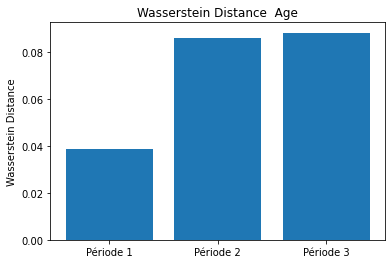

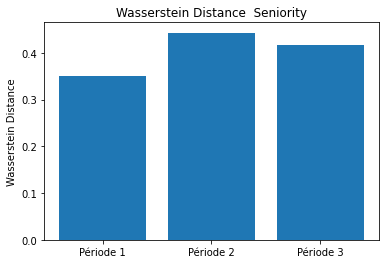

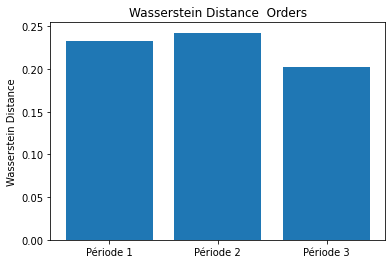

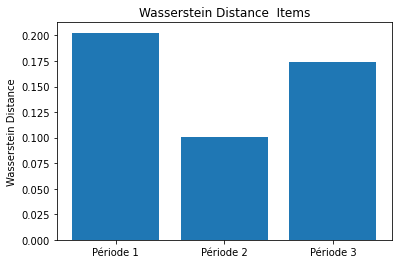

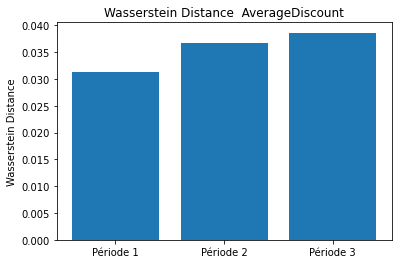

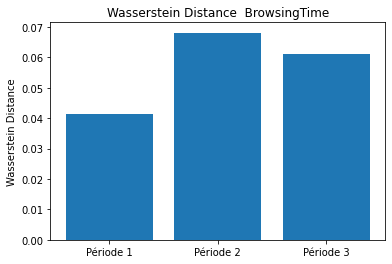

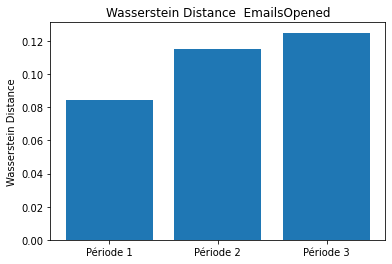

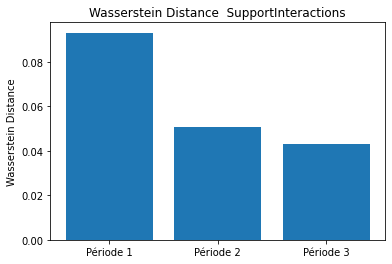

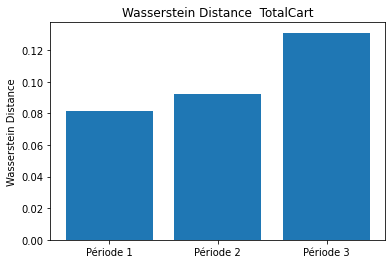

In [32]:

# Définir les noms de colonnes numériques
numeric_cols = period_0._get_numeric_data().columns

# Définir les distances de Wasserstein pour chaque variable et chaque période
W_values = []
for i in range(1, 4):
    df_name = f"period_{i}_normalized"
    df_i = globals()[df_name]
    print("Distances de Wasserstein entre la période 0 et la période", i, ":")
    W_values.append([WassersteinDistance(period_0_normalized[col], df_i[col], 1) for col in numeric_cols])
    for col, distance in zip(numeric_cols, W_values[i-1]):
        print(col+":", distance)
    print("\n")

# Tracer le graphique en barres pour chaque variable
for i in range(len(numeric_cols)):
    plt.bar(np.arange(1, 4), [W_values[j][i] for j in range(3)], align='center')
    plt.xticks(np.arange(1, 4), ["Période 1", "Période 2", "Période 3"])
    plt.title(f"Wasserstein Distance  {numeric_cols[i]}")
    plt.ylabel("Wasserstein Distance")
    plt.show()

La distance de Wasserstein est une mesure de la similarité entre deux distributions de probabilité, donc ces résultats indiquent la différence entre la distribution de chaque variable à la période 0 et la distribution de chaque variable à chaque période respective (1, 2, 3).

Distance de Wasserstein TotalCart - Period 1 :  0.08123669659559345
Distance de Wasserstein TotalCart - Period 2 :  0.09217964567686793
Distance de Wasserstein TotalCart - Period 3 :  0.13098279910405744
__________________________________________________


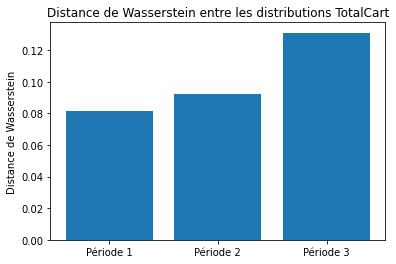

In [33]:
# Calcul de la distance de Wasserstein pour la variable TotalCart pour chaque période par rapport à la période 0
w1 = WassersteinDistance(period_0_normalized['TotalCart'], period_1_normalized['TotalCart'], 1)
w2 = WassersteinDistance(period_0_normalized['TotalCart'], period_2_normalized['TotalCart'], 1)
w3 = WassersteinDistance(period_0_normalized['TotalCart'], period_3_normalized['TotalCart'], 1)

# Définir les étiquettes d'axe pour le graphique
periods = ['Période 1', 'Période 2', 'Période 3']

# Définir les valeurs de Distance de Wasserstein pour chaque période
W_values = [w1, w2, w3]

# Tracer le graphique en barres
plt.bar(periods, W_values)

plt.title('Distance de Wasserstein entre les distributions TotalCart')
plt.ylabel('Distance de Wasserstein')

print("Distance de Wasserstein TotalCart - Period 1 : ", w1)
print("Distance de Wasserstein TotalCart - Period 2 : ", w2)
print("Distance de Wasserstein TotalCart - Period 3 : ", w3)
print("__________________________________________________")

# Afficher le graphique
plt.show()

On observe que la distance de Wasserstein pour TotalCart est plus grande que pour les autres variables, ce qui signifie que la distribution de TotalCart à chaque période est plus différente de celle de la période 0 que les autres variables. Cela pourrait indiquer une possible dérive dans les données pour cette variable et que la distribution de la variable TotalCart a changé entre la période 0 et les périodes 1 à 3.

Nous allons maintenant comparer la distribution de la variable TopCategory pour chaque période à l'aide de la divergence de Kullback-Leibler. Nous allons comparer chaque période à la période 0.

Divergence de Kullback-Leibler TopCategory - Period 1 :  0.01788286673757212
Divergence de Kullback-Leibler TopCategory - Period 2 :  0.01961760514838459
Divergence de Kullback-Leibler TopCategory - Period 3 :  0.041368125368780005
__________________________________________________


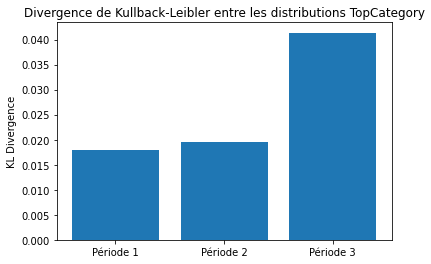

In [34]:
# Calcul de la divergence de Kullback-Leibler pour la variable TopCategory pour chaque période par rapport à la période 0
p0 = period_0['TopCategory'].value_counts(normalize=True)
p1 = period_1['TopCategory'].value_counts(normalize=True)
p2 = period_2['TopCategory'].value_counts(normalize=True)
p3 = period_3['TopCategory'].value_counts(normalize=True)

k1 = KLDivergence(p0, p1)
k2 = KLDivergence(p0, p2)
k3 = KLDivergence(p0, p3)

# Définir les valeurs de KL divergence pour chaque période
KL_values = [k1, k2, k3]

plt.bar(periods, KL_values)
plt.title('Divergence de Kullback-Leibler entre les distributions TopCategory')
plt.ylabel('KL Divergence')

print("Divergence de Kullback-Leibler TopCategory - Period 1 : ", k1)
print("Divergence de Kullback-Leibler TopCategory - Period 2 : ", k2)
print("Divergence de Kullback-Leibler TopCategory - Period 3 : ", k3)
print("__________________________________________________")

# Afficher le graphique
plt.show()

La divergence de Kullback-Leibler mesure également la différence entre deux distributions de probabilité, mais elle est asymétrique, donc la divergence KL entre P et Q n'est pas la même que la divergence KL entre Q et P. On peut voir que la divergence de KL pour TopCategory est plus grande à la période 3 que pour les autres périodes (augmente au cours du temps), indiquant peut-être une plus grande différence entre la distribution de TopCategory à la période 3 et celle de la période 0.



Divergence de Jensen-Shannon TopCategory - Period 1 :  0.004543012975517582
Divergence de Jensen-Shannon TopCategory - Period 2 :  0.004842393153548317
Divergence de Jensen-Shannon TopCategory - Period 3 :  0.010243641370144203
__________________________________________________


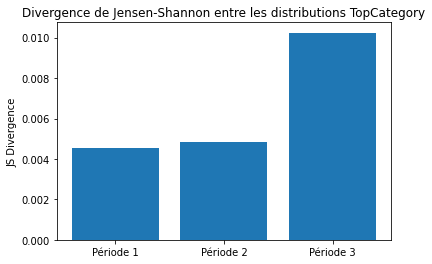

In [35]:
k1 = JSDivergence(p0, p1)
k2 = JSDivergence(p0, p2)
k3 = JSDivergence(p0, p3)

# Définir les valeurs de JS divergence pour chaque période
JS_values = [k1, k2, k3]

plt.bar(periods, JS_values)
plt.title('Divergence de Jensen-Shannon entre les distributions TopCategory')
plt.ylabel('JS Divergence')


print("Divergence de Jensen-Shannon TopCategory - Period 1 : ", k1)
print("Divergence de Jensen-Shannon TopCategory - Period 2 : ", k2)
print("Divergence de Jensen-Shannon TopCategory - Period 3 : ", k3)
print("__________________________________________________")

# Afficher le graphique
plt.show()

De même, on remarque qu'il y a une augmentation de la Divergence de Jensen-Shannon au cours du temps pour la variable TopCategorie.

En examinant les résultats, on constate que les distances de Wasserstein, les KL et JS divergences varient considérablement entre les différentes caractéristiques des données, mais globalement, les distances et les divergences sont relativement faibles.

En résumé, bien que le modèle puisse être considéré comme performant, il est important de surveiller les caractéristiques individuelles et effectuer une mise à jour du modèle pour mieux s'adapter surtout aux données des périodes 2 et 3 et garantir des prédictions précises et fiables.